### Complete Case Analysis

CCA is deleting all the rows wherever the row has a missing values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
6382,18051,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,100-500,Pvt Ltd,46.0,0
15745,4356,city_162,0.767,Male,Has relevent experience,Part time course,Graduate,STEM,6.0,100-500,Pvt Ltd,95.0,0
16608,4993,city_90,0.698,NaN,No relevent experience,NaN,NaN,NaN,2.0,NaN,NaN,50.0,0
12714,31902,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,<10,Pvt Ltd,105.0,0
6013,17330,city_90,0.698,Male,Has relevent experience,no_enrollment,Masters,STEM,15.0,NaN,NaN,19.0,1


In [4]:
df.shape

(19158, 13)

In [5]:
df.isnull().sum().sort_values(ascending=False)

company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
training_hours             766
city_development_index     479
education_level            460
enrolled_university        386
experience                  65
enrollee_id                  0
city                         0
relevent_experience          0
target                       0
dtype: int64

In [11]:
(df.isnull().mean()*100).sort_values(ascending=False)  # In percentage

company_type              32.049274
company_size              30.994885
gender                    23.530640
major_discipline          14.683161
training_hours             3.998330
city_development_index     2.500261
education_level            2.401086
enrolled_university        2.014824
experience                 0.339284
enrollee_id                0.000000
city                       0.000000
relevent_experience        0.000000
target                     0.000000
dtype: float64

In [13]:
# (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100  # In percentage

In [19]:
null_counts = df.isnull().sum().sort_values(ascending=False)
null_percentage = (df.isnull().mean()*100).sort_values(ascending=False)

null_dataset_percentage = pd.concat([null_counts, null_percentage], axis=1, keys=['Counts', '% Missing'])

null_dataset_percentage.head(11)

,Counts,% Missing
company_type,6140,32.049274
company_size,5938,30.994885
gender,4508,23.530640
major_discipline,2813,14.683161
training_hours,766,3.998330
city_development_index,479,2.500261
education_level,460,2.401086
enrolled_university,386,2.014824
experience,65,0.339284
enrollee_id,0,0.000000


In [20]:
df.shape

(19158, 13)

In [23]:
(df.isnull().mean()).sort_values(ascending=False)

company_type              0.320493
company_size              0.309949
gender                    0.235306
major_discipline          0.146832
training_hours            0.039983
city_development_index    0.025003
education_level           0.024011
enrolled_university       0.020148
experience                0.003393
enrollee_id               0.000000
city                      0.000000
relevent_experience       0.000000
target                    0.000000
dtype: float64

In [25]:
# Lets findout cols where less than 5% data is missing

CCA_cols = [col for col in df.columns if df[col].isnull().mean() < 0.05 and df[col].isnull().mean() > 0 ]
#missing val more than 0 and less than 5 %

CCA_cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [26]:
df[CCA_cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
18796,0.899,no_enrollment,Graduate,15.0,282.0
15119,0.920,no_enrollment,Graduate,14.0,122.0
16307,0.624,no_enrollment,Graduate,12.0,17.0
12590,0.624,no_enrollment,Masters,10.0,41.0
8385,0.887,no_enrollment,Graduate,20.0,96.0


In [28]:
# Let's find out that how much our data will get affected if we drop the missing rows of these cols

# len(df[CCA_cols].dropna()) # 17182

len(df[CCA_cols].dropna()) / len(df) # 89% data will remain means 11% overall data will be deleted from these cols

0.8968577095730244

In [29]:
new_df = df[CCA_cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

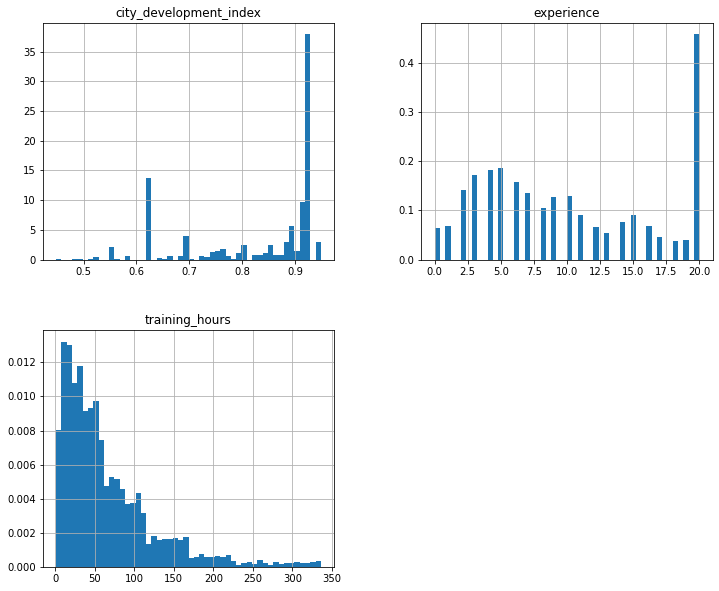

In [31]:
new_df.hist(bins=50, density=True, figsize=(12, 10))
plt.show()

**Numeric columns**

<AxesSubplot:>

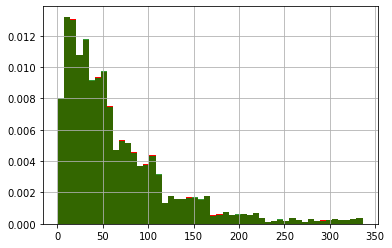

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

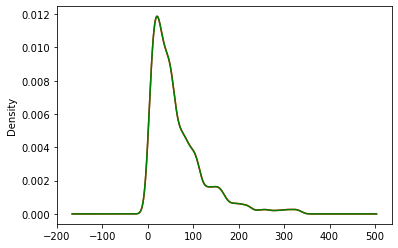

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<AxesSubplot:>

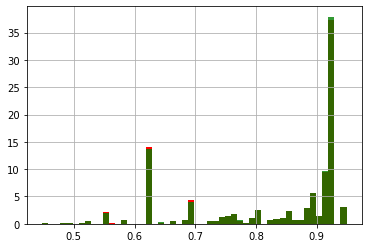

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

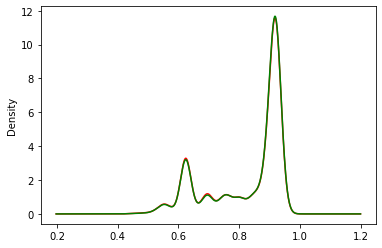

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<AxesSubplot:>

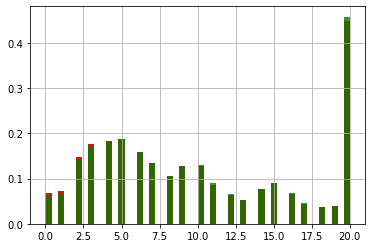

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

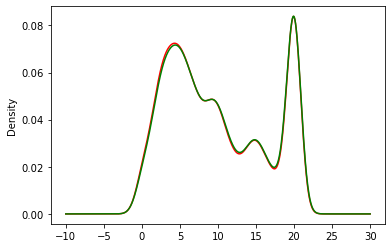

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

We can conclude that for all the numeric values, the data distribution is still same even after dropping the rows.
Which means the rows were Missing Completely At Random(MCAR)

**Categorical Columns**

In [38]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [39]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


As we can see, There is no much of difference in the data distribution even for deleting the rows which means rows were
Missing Completely At Random(MCAR)